In [1]:
from sweep_utils import *

In [2]:
param_configs = "../param_configs/adamw_classic_kq_all_lr_l1.json"
script_name = "../scripts/run_fineweb1B_adamw_classic.sh"

df, _ = load_sweep_jsons(param_configs, script_name)

In [3]:
# d_conf = { 
#           "fista_st20_bv": ("../param_configs/attn_fista_rhomu_best_val_lr_sweep_l1_20it.json" ,
#                            "../scripts/run_fineweb1B_adamw_classic_fista_classic_l1.sh"),
#           "fista_st20_bkq": ("../param_configs/attn_fista_rhomu_best_kq_lr_sweep_l1_20it.json" ,
#                            "../scripts/run_fineweb1B_adamw_classic_fista_classic_l1.sh"),
#           "fista_st100_bv": ("../param_configs/attn_fista_rhomu_best_val_lr_sweep_l1_100it.json" ,
#                            "../scripts/run_fineweb1B_adamw_classic_fista_classic_l1.sh"),
#           "fista_st100_bkq": ("../param_configs/attn_fista_rhomu_best_kq_lr_sweep_l1_100it.json" ,
#                            "../scripts/run_fineweb1B_adamw_classic_fista_classic_l1.sh"),
#                            }

# df_fista, _ = load_sweep_jsons_all(d_conf)

# df = pd.concat([df, df_fista], ignore_index=True)
# len(df)

In [4]:
df[:3]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,lr,model,wd
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.533046,4.525009,4.525009,30.75,26.375,25.193952,0.0001,gpt-small-l1-softcap,0.0
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,3.772160,3.760035,3.760035,50.00,50.000,49.331691,0.005,gpt-small-l1-softcap,0.0
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.677026,7.674092,7.674092,50.00,50.000,49.933524,0.5,gpt-small-l1-softcap,0.0


In [5]:
df[df["lr"].isin(['0.1', '0.5', '1.0'])][["model", "min_val_loss", "kq_max", "lr"]]

,model,min_val_loss,kq_max,lr
2,gpt-small-l1-softcap,7.674092,5.000000e+01,0.5
6,gpt-small-l1-softcap,5.919480,5.000000e+01,0.1
7,gpt-small-l1-softcap,8.538509,5.000000e+01,1.0
11,gpt-small-l1-lnorm,7.675455,2.416000e+03,0.5
15,gpt-small-l1-lnorm,3.923601,9.100000e+01,0.1
16,gpt-small-l1-lnorm,8.299339,6.432000e+03,1.0
20,gpt-small-l1-w-clip,7.673355,9.543680e+05,0.5
24,gpt-small-l1-w-clip,4.078281,2.064000e+03,0.1
25,gpt-small-l1-w-clip,8.061894,1.382400e+05,1.0
29,gpt-small-l1-default,13.975527,6.281390e+10,0.5


(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

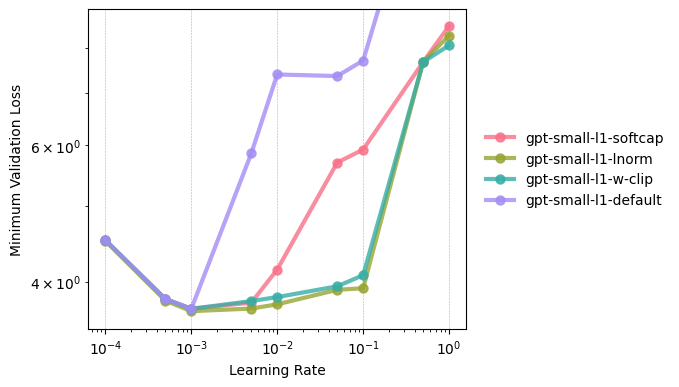

In [6]:
plot_lr_sweep_over_models(df, ycol="min_val_loss", ylog=True, ylim=(3.9, 8.))

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

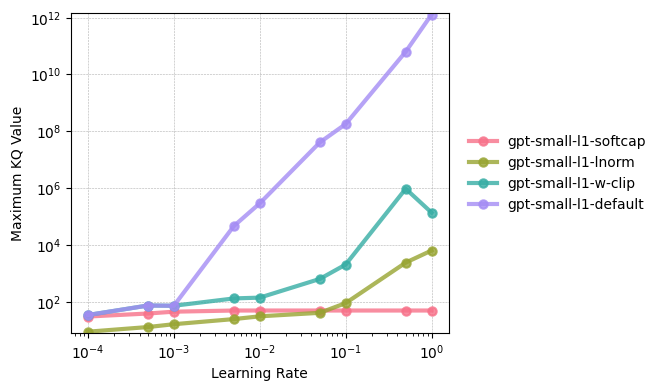

In [7]:
plot_lr_sweep_over_models(df, ycol="kq_max", ylog=True)

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Minimum Validation Loss'>)

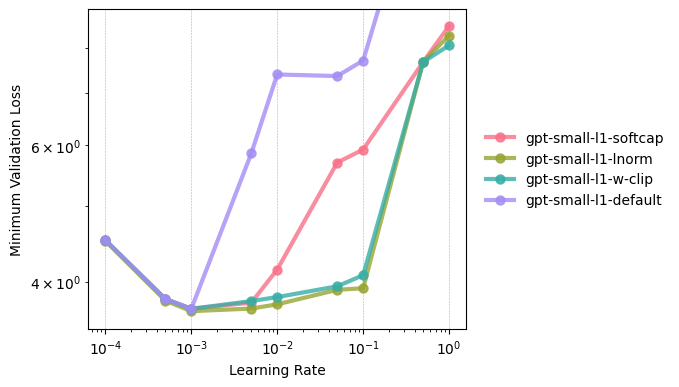

In [8]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-l1-softcap', 'gpt-small-l1-lnorm', 'gpt-small-l1-w-clip', 
                                               'gpt-small-l1-default'])], ycol="min_val_loss", ylog=True, ylim=(3.9, 8.))

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Learning Rate', ylabel='Maximum KQ Value'>)

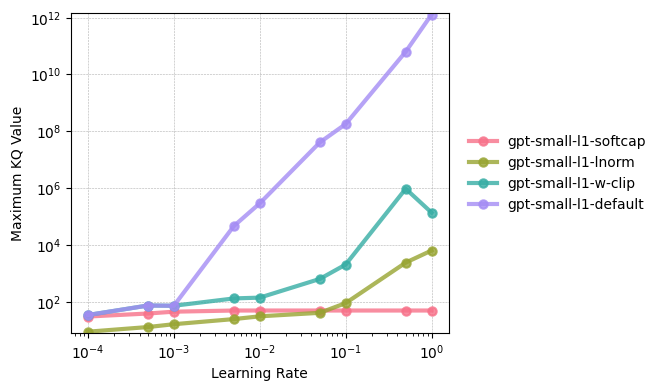

In [9]:
plot_lr_sweep_over_models(df[df["model"].isin(['gpt-small-l1-softcap', 'gpt-small-l1-lnorm', 'gpt-small-l1-w-clip', 
                                               'gpt-small-l1-default'])], ycol="kq_max", ylog=True)

In [10]:
df.loc[df["min_val_loss"].idxmin()].to_frame().T[["model", "min_val_loss", "kq_max", "lr"]]

,model,min_val_loss,kq_max,lr
17,gpt-small-l1-lnorm,3.665847,16.5,0.001


In [11]:
models = ['gpt-small-l1-softcap', 'gpt-small-l1-lnorm', 'gpt-small-l1-w-clip', 'gpt-small-l1-default']

sub = df[df["model"].isin(models)]
best_per_model = sub.loc[sub.groupby("model")["min_val_loss"].idxmin(), ["model", "min_val_loss", "kq_max", "lr"]]
best_per_model

,model,min_val_loss,kq_max,lr
35,gpt-small-l1-default,3.691295,73.5,0.001
17,gpt-small-l1-lnorm,3.665847,16.5,0.001
8,gpt-small-l1-softcap,3.692751,45.5,0.001
26,gpt-small-l1-w-clip,3.691295,73.5,0.001


In [12]:
a, b = 3.665847, 3.90963
abs(a-b) / max(a, b)

0.06235449390351519